In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import random
import time
from scipy import stats
from pprint import pprint
from time import sleep

#import weather API Key
from config import api_key

#Use citipy to find city based on Latitude and Longitude
from citipy import citipy 


# Generate the List of Cities

In [2]:
# generate the list of coordinates used to find cities

#set the desired number of cities
num_cities = 500

#set the lists for latitude and longitude
lat = []
lng = []

#it is possible that duplicate coordinates may be generated, or unique coordinates may lead to duplicate cities.
# this buffer will allow the dataset to drop duplicates while still generating enough coordinates for the search.
coordinate_buffer = 3

lat = np.random.uniform(low=-90.000, high=90.000, size=num_cities*coordinate_buffer)
lng = np.random.uniform(low=-180.000, high=180.000, size=num_cities*coordinate_buffer)

#zip the latitudes and longitudes into a list of tuples to look up values in citipy
coordinates = list(zip(lat, lng))

In [3]:
# generate the list of cities using coordinates
cities = []

#find cities that match coordinates in citipy:
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #add to the list of cities only if it is not a duplicate
    if city not in cities:
        cities.append(city)
    

# Search for the Cities

In [4]:
# set url and units for search query

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="



In [5]:
#save the following values for each city: 
# Temperature, % Humidity, % Cloudiness, Wind speed MPH
cityList = []
temp = []
humid = []
cloud = []
wind = []
newlat = []
newlong = []
country = []
count = 0

# loop through each city
for city in cities:
    
#     create a search query, make request and store in json
    full_query = query_url + city
    response = requests.get(full_query)
    weather_data = response.json()
    
    # check to see if the city is in the database. If not, move on to the next city in the list.
    try: 
        # if there is a match, add the needed information to each list
        newlat.append(weather_data['coord']['lat'])  
        newlong.append(weather_data['coord']['lon'])
        temp.append(weather_data['main']['temp'])
        humid.append(weather_data['main']['humidity'])
        wind.append(weather_data['wind']['speed'])
        cloud.append(weather_data['clouds']['all'])
        cityList.append(weather_data['name'])
        country.append(weather_data['sys']['country'])
        
#         Update the counter
        count = count + 1
    
#         Print the results
        print(f'{count}. {city} data has been saved.')
        
        
    except:
        print(f'{city} could not be found.')
        
    # delay the next query to avoid exceeding the API limits
    sleep(1)  


1. hermanus data has been saved.
2. agirish data has been saved.
belushya guba could not be found.
3. nanortalik data has been saved.
4. acapulco data has been saved.
illoqqortoormiut could not be found.
5. avarua data has been saved.
6. rikitea data has been saved.
7. saint-philippe data has been saved.
8. hobart data has been saved.
9. ushumun data has been saved.
10. yellowknife data has been saved.
11. huntington data has been saved.
12. dikson data has been saved.
13. tabou data has been saved.
amderma could not be found.
14. tazovskiy data has been saved.
15. busselton data has been saved.
16. bluff data has been saved.
17. bilma data has been saved.
18. porto novo data has been saved.
taolanaro could not be found.
nizhneyansk could not be found.
19. mataura data has been saved.
20. shirokiy data has been saved.
21. tasiilaq data has been saved.
22. zambezi data has been saved.
23. georgetown data has been saved.
24. daru data has been saved.
25. punta arenas data has been saved.

217. brae data has been saved.
218. fort wellington data has been saved.
219. faanui data has been saved.
220. yuzhno-kurilsk data has been saved.
221. kumluca data has been saved.
222. banda aceh data has been saved.
223. whitehorse data has been saved.
224. khatanga data has been saved.
225. lopukhiv data has been saved.
226. gainesville data has been saved.
227. bull savanna data has been saved.
228. leh data has been saved.
229. progreso data has been saved.
230. loudi data has been saved.
231. balasheyka data has been saved.
tidore could not be found.
232. saskylakh data has been saved.
233. esperance data has been saved.
234. karratha data has been saved.
235. guane data has been saved.
236. nikolskoye data has been saved.
237. pemangkat data has been saved.
238. willowmore data has been saved.
239. ambon data has been saved.
samusu could not be found.
240. vostok data has been saved.
241. saldana data has been saved.
242. hof data has been saved.
243. tura data has been saved.
2

439. hofn data has been saved.
440. mizan teferi data has been saved.
441. margate data has been saved.
442. ulsteinvik data has been saved.
443. lastoursville data has been saved.
444. bontang data has been saved.
445. pangai data has been saved.
446. preston data has been saved.
447. homer data has been saved.
tumannyy could not be found.
448. jiazi data has been saved.
449. hirara data has been saved.
450. verkhnyaya inta data has been saved.
451. severo-kurilsk data has been saved.
452. paamiut data has been saved.
453. oia data has been saved.
hunza could not be found.
454. padang data has been saved.
455. mineros data has been saved.
456. kukushtan data has been saved.
457. laguna data has been saved.
458. west bay data has been saved.
459. aylmer data has been saved.
460. batagay-alyta data has been saved.
461. mettur data has been saved.
462. santiago data has been saved.
sorvag could not be found.
463. tendukheda data has been saved.
464. ca mau data has been saved.
465. salta

In [6]:
# #create a data frame from cities, temp, humid, cloud, and wind
weatherInfoDict = {
    "City":cityList,
#     "Country Code":country,
    "Latitude":newlat,
    "Longintude":newlong, 
    "Temperature (F)":temp,
    "% Humidity":humid,
    "% Cloud Cover":cloud,
    "Wind Speed (MPH)":wind
}

weatherDF = pd.DataFrame(weatherInfoDict)
weatherDF

,City,Latitude,Longintude,Temperature (F),% Humidity,% Cloud Cover,Wind Speed (MPH)
0,Hermanus,-34.42,19.23,46.99,94,4,5.35
1,Agirish,61.92,63.02,47.37,76,75,0.67
2,Nanortalik,60.14,-45.24,47.32,93,100,7.67
3,Acapulco de Juárez,16.86,-99.89,87.80,70,75,8.05
4,Avarua,-21.21,-159.78,71.60,83,29,8.05
...,...,...,...,...,...,...,...
547,Palembang,-2.92,104.75,71.83,92,97,3.76
548,Wakkanai,45.41,141.67,59.74,90,8,11.52
549,Laramie,41.31,-105.59,58.10,82,90,20.80
550,Pind Dadan Khan,32.59,73.05,92.19,49,0,7.29


# Scatter Plot Function

In [7]:
# create a function for scatter plots
def plotFunc(x_values, y_values):
    #create plot
    plt.figure(figsize=(6, 4), dpi=80)
    plt.scatter(x_values, y_values)


# Linear Regression Plot Function

In [8]:
#optional: create a function that writes linear regression plots
def linRegressFunc(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    #create plot
    plt.figure(figsize=(6, 4), dpi=80)
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    #create line equation and annotate
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15,color="red")

    
    #calculate and print r squared to determine strength of correlation
    print(f'The r-squared is: {rvalue**2}')

# Temperature vs. Latitude
Worldwide plot and both regressions

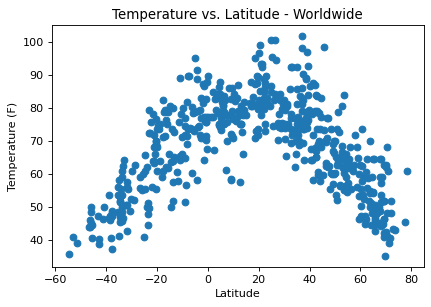

In [9]:
#First plot - Temperature vs. Latitude

#call the scatter plot function
plotFunc(weatherDF["Latitude"], weatherDF['Temperature (F)'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs. Latitude - Worldwide")

#save chart as png
plt.savefig("images/Temp_vs_Lat_All.png")

plt.show()

The r-squared is: 0.5254796629968453


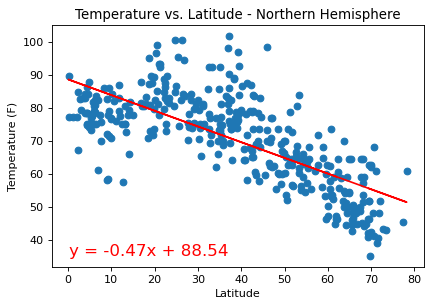

In [10]:
#Northern Hemisphere - Temperature vs. latitude

#filter for values in the northern hemisphere
northDF = weatherDF.loc[weatherDF["Latitude"] > 0]

linRegressFunc(northDF["Latitude"], northDF['Temperature (F)'])

# label axes and add title
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs. Latitude - Northern Hemisphere")

#save plot as png
plt.savefig("images/Temp_vs_Lat_North.png")

plt.show()

The r-squared is: 0.658399560553484


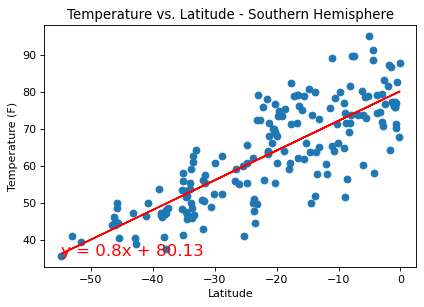

In [11]:
#Southern Hemisphere - Temperature vs. latitude

#filter for values in the southern hemisphere
southDF = weatherDF.loc[weatherDF["Latitude"] < 0]

linRegressFunc(southDF["Latitude"], southDF['Temperature (F)'])

# label axes and add title
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs. Latitude - Southern Hemisphere")

#save plot as png
plt.savefig("images/Temp_vs_Lat_South.png")

plt.show()

# Temperature Analysis


# % Humidity vs. Latitude
Worldwide plot and both regressions

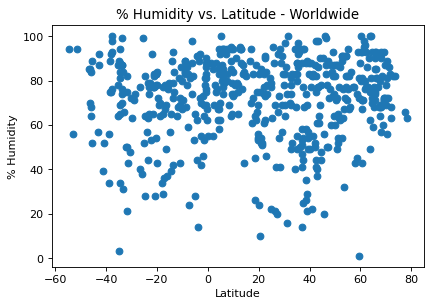

In [12]:
#Second plot - Humidity (%) vs. Latitude

#call the scatter plot function
plotFunc(weatherDF["Latitude"], weatherDF['% Humidity'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.title("% Humidity vs. Latitude - Worldwide")

#save chart as png
plt.savefig("images/Humid_vs_Lat_All.png")

plt.show()

The r-squared is: 6.84602575792185e-05


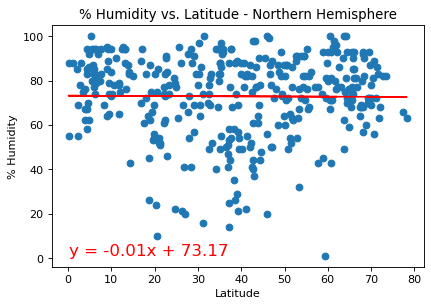

In [13]:
# Humidity (%) vs. Latitude Northern Hemisphere

#call the linear regresssion plot function
linRegressFunc(northDF["Latitude"], northDF['% Humidity'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.title("% Humidity vs. Latitude - Northern Hemisphere")

#save chart as png
plt.savefig("images/Humid_vs_Lat_North.png")

plt.show()

The r-squared is: 0.0008095951774967153


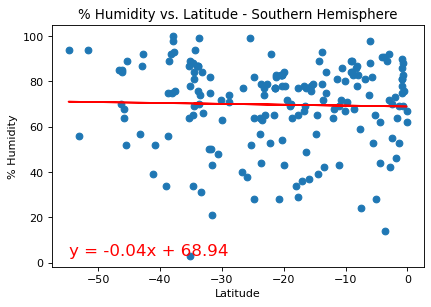

In [14]:
# Humidity (%) vs. Latitude Southern Hemisphere

#call the linear regresssion plot function
linRegressFunc(southDF["Latitude"], southDF['% Humidity'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.title("% Humidity vs. Latitude - Southern Hemisphere")

#save chart as png
plt.savefig("images/Humid_vs_Lat_South.png")

plt.show()

# Humidity Analsyis


# Cloudiness (%) vs. Latitude
Worldwide plot and both regressions

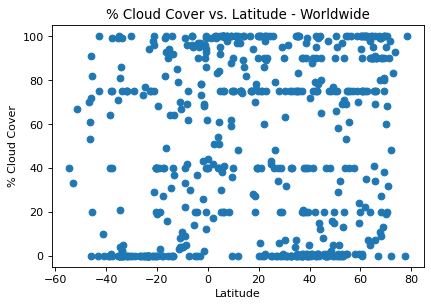

In [15]:
#Third plot - Cloudiness (%) vs. Latitude

#call the scatter plot function
plotFunc(weatherDF["Latitude"], weatherDF['% Cloud Cover'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("% Cloud Cover")
plt.title("% Cloud Cover vs. Latitude - Worldwide")

#save chart as png
plt.savefig("images/Cloud_vs_Lat_All.png")

plt.show()

The r-squared is: 0.002476953240153649


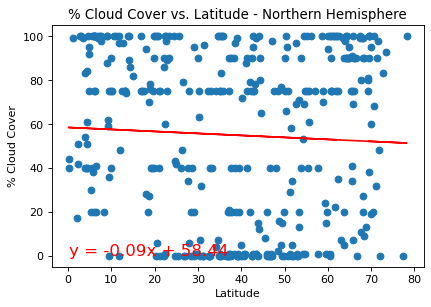

In [16]:
# Cloudiness (%) vs. Latitude - Northern Hemisphere

#call the linear regresssion plot function
linRegressFunc(northDF["Latitude"], northDF['% Cloud Cover'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("% Cloud Cover")
plt.title("% Cloud Cover vs. Latitude - Northern Hemisphere")

#save chart as png
plt.savefig("images/Cloud_vs_Lat_North.png")

plt.show()

The r-squared is: 0.02710830918616345


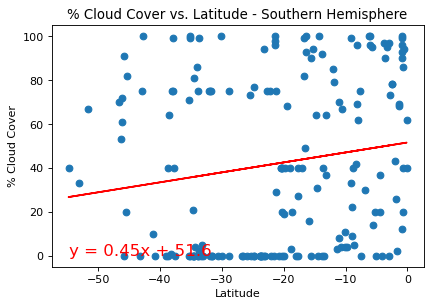

In [17]:
# Cloudiness (%) vs. Latitude - Southern Hemisphere

#call the linear regresssion plot function
linRegressFunc(southDF["Latitude"], southDF['% Cloud Cover'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("% Cloud Cover")
plt.title("% Cloud Cover vs. Latitude - Southern Hemisphere")

#save chart as png
plt.savefig("images/Cloud_vs_Lat_South.png")

plt.show()

# Cloudiness Analysis

# Wind Speed vs. Latitude
Worldwide plot and both regressions

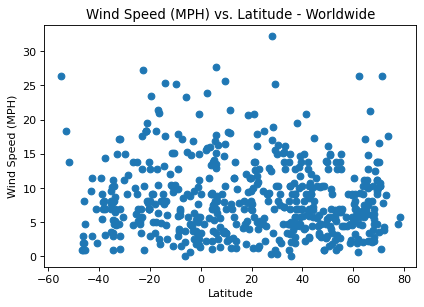

In [18]:
#Fourth Plot - Wind Speed (mph) vs. Latitude

#call the scatter plot function
plotFunc(weatherDF["Latitude"], weatherDF['Wind Speed (MPH)'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Wind Speed (MPH) vs. Latitude - Worldwide")

#save chart as png
plt.savefig("images/Wind_vs_Lat_All.png")

plt.show()


The r-squared is: 0.011668145193091777


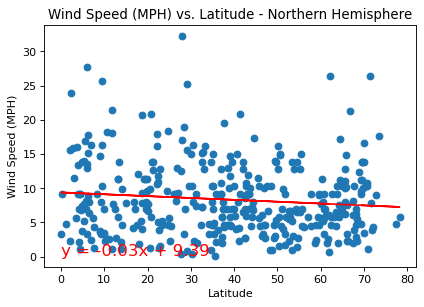

In [19]:
# Wind Speed (mph) vs. Latitude Northern Hemisphere

#call the linear regresssion plot function
linRegressFunc(northDF["Latitude"], northDF['Wind Speed (MPH)'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Wind Speed (MPH) vs. Latitude - Northern Hemisphere")

#save chart as png
plt.savefig("images/Wind_vs_Lat_North.png")

plt.show()

The r-squared is: 0.00014418477065724226


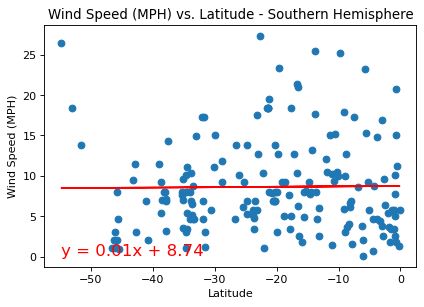

In [20]:
# Wind Speed (mph) vs. Latitude Southern Hemisphere

#call the linear regresssion plot function
linRegressFunc(southDF["Latitude"], southDF['Wind Speed (MPH)'])

#label the axes and create title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Wind Speed (MPH) vs. Latitude - Southern Hemisphere")

#save chart as png
plt.savefig("images/Wind_vs_Lat_South.png")

plt.show()

# Wind Speed Analysis


In [21]:
#save all data in a CSV
weatherDF.to_csv('../data/weather_data.csv', encoding='utf-8', index=False)